In [1]:
#Python Project 2
#House Price Prediction

#Task 1
#1)	Import necessary and essential libraries
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.templates.default="plotly_white"



In [ ]:
#2)	Display all the Columns of DataFrames
data = pd.read_excel("/content/HousePrediction.xlsx")

data.head()


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [ ]:
#3)	Read the data and display the first 100 rows from the data

data.head(100)



,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,60,RL,9765,Corner,1Fam,8,1993,1993,VinylSd,0.0,680.0,185000.0
96,96,20,RL,10264,Inside,1Fam,5,1999,1999,VinylSd,0.0,1588.0,214000.0
97,97,20,RL,10921,Inside,1Fam,5,1965,1965,HdBoard,0.0,960.0,94750.0
98,98,30,RL,10625,Corner,1Fam,5,1920,1950,Wd Sdng,0.0,458.0,83000.0


In [ ]:
#4)	Give the column insights

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
#Task 2
#1)Checking for Missing Values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [ ]:
#2) Features with NAN Values
#There are 3 features of NAN values Merge,join and concatenate

#Merge is used to merge the data frames using the unique column
#identifier. By default, the merge happens on an inner that is the
#intersection of all the elements. Syntax: pd.merge(df1, df2, ‘outer’,
#on=’custId’)

#Join is used to join the data frames using the unique index. The left join
#is the default which means it takes all the exclusive ids of the data frame
#that exists on the left table. It will return all the indexes on the left side
#of the table and NaN for the corresponding values that don’t exist on the
#right table. Syntax: df1.join(df2)

#Concatenate: It joins the data frames basically either by rows or
#columns. Syntax: pd.concat(df1,df2

In [ ]:
#3) Calculate  with  mean  sales Price where the information is present or Missing

import statistics as st
from statsmodels.stats import weightstats as stests
from numpy import random

saleprice = data["SalePrice"]
print(" Sale Price data:",saleprice)

Sale_Mean = st.mean(saleprice)
print("The mean of sale price :",Sale_Mean)


 Sale Price data: 0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64
The mean of sale price : nan


In [ ]:
#4)Gives the Count  of Numerical features
import pandas as pd

df = pd.DataFrame(data)


numerical_count = sum(df[col].dtype in [int, float] for col in df.columns)

print("Count of numerical features:", numerical_count)


Count of numerical features: 2919


In [ ]:
#5)Prints the first five rows of numerical values
import pandas as pd


data = {
    'Id': [0,1, 2, 3, 4],
    'MSSubClass': [60,20,60,70,60],
    'MSZoning': ['RL', 'RL', 'RL', 'RL', 'RL']
}

df = pd.DataFrame(data)


numerical_cols = df.select_dtypes(include=['int', 'float'])

print("First five rows of numerical values:")
print(numerical_cols.head())



First five rows of numerical values:
   Id  MSSubClass
0   0          60
1   1          20
2   2          60
3   3          70
4   4          60


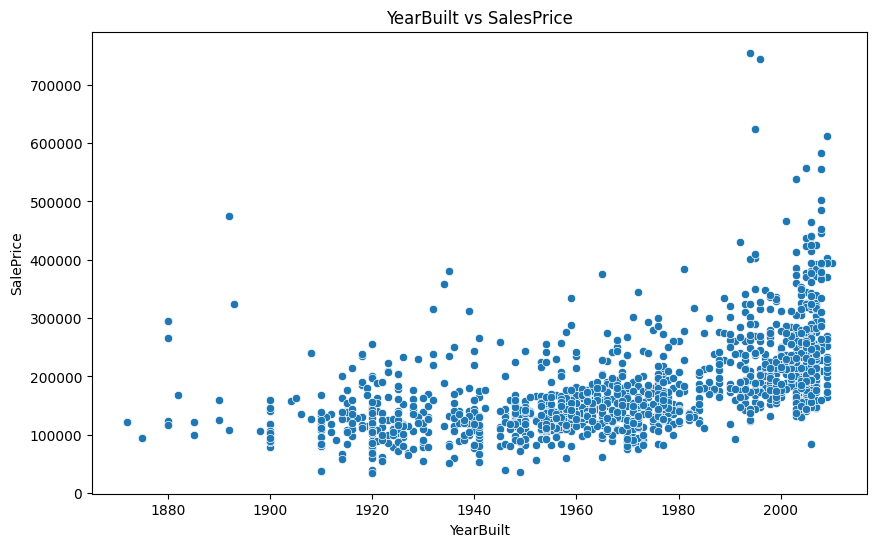

In [ ]:
#6)We will Compare the difference between all the years features with SalesPrice


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_excel('/content/HousePrediction.xlsx')


# Scatter plot to visualize the relationship between 'YearBuilt' and 'SalesPrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice',data=data)
plt.title('YearBuilt vs SalesPrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()





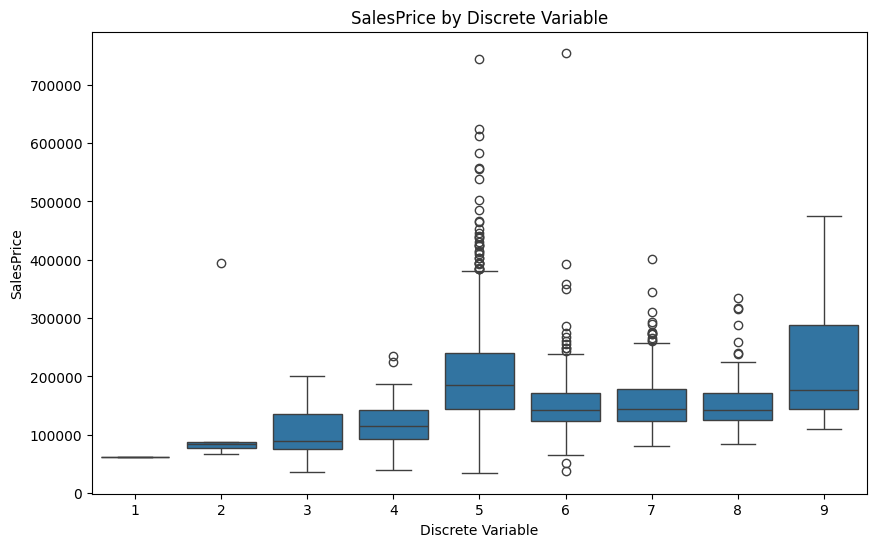

In [ ]:
#7) On the Discrete Variable  Find the relationship between Discrete and Sales price
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


data = pd.read_excel('/content/HousePrediction.xlsx')

# Visualize the relationship using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallCond', y='SalePrice', data=data)
plt.title('SalesPrice by Discrete Variable')
plt.xlabel('Discrete Variable')
plt.ylabel('SalesPrice')
plt.show()





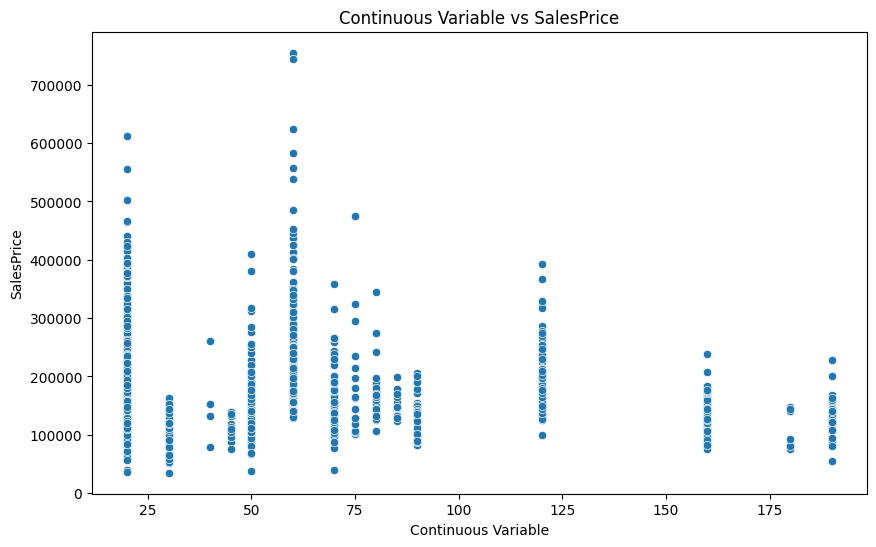

In [ ]:
#8) On the Continous Variable  Find the relationship between Discrete and Sales Price

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('/content/HousePrediction.xlsx')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MSSubClass', y='SalePrice', data=data)
plt.title('Continuous Variable vs SalesPrice')
plt.xlabel('Continuous Variable')
plt.ylabel('SalesPrice')
plt.show()


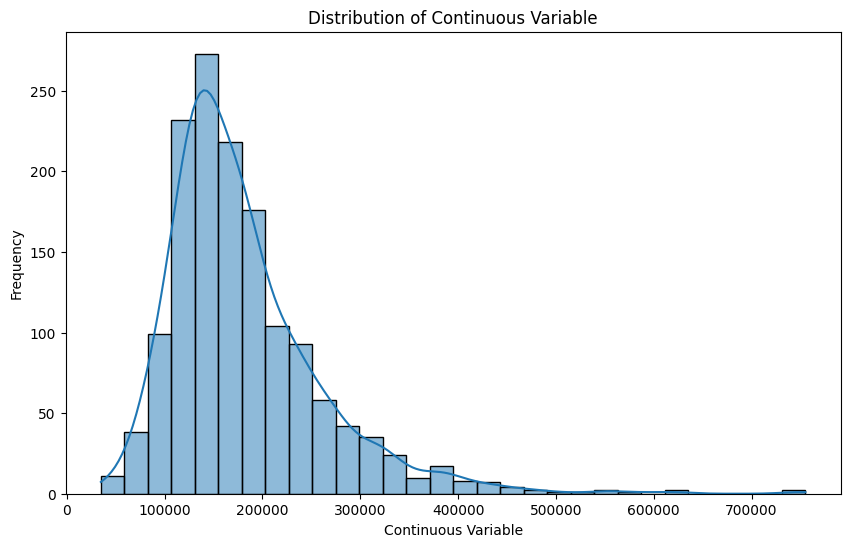

In [ ]:
#9)Analyse the Continous values by creating the histogram to understand the distribution.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('/content/HousePrediction.xlsx')

plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Continuous Variable')
plt.xlabel('Continuous Variable')
plt.ylabel('Frequency')
plt.show()



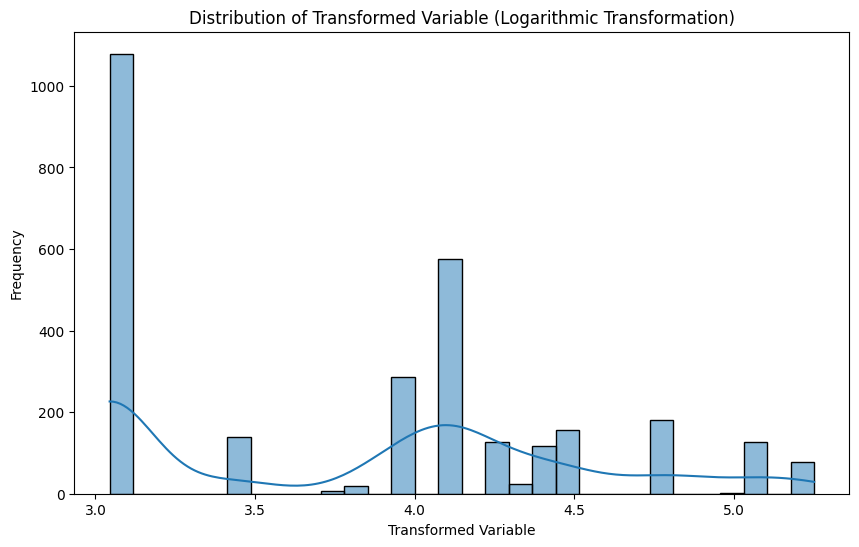

In [ ]:
#10)Apply the Lograthmic Transformation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('/content/HousePrediction.xlsx')


data['SalePrice'] = np.log(data['MSSubClass'] + 1)

plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Transformed Variable (Logarithmic Transformation)')
plt.xlabel('Transformed Variable')
plt.ylabel('Frequency')
plt.show()


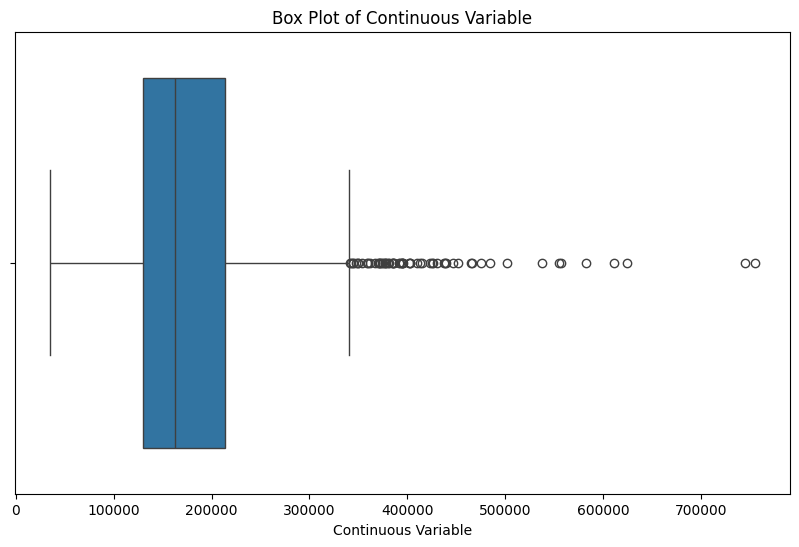


Outliers using Box plot method:
        Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
11      11          60       RL    11924    Inside     1Fam            5   
53      53          20       RL    50271    Inside     1Fam            5   
58      58          60       RL    13682   CulDSac     1Fam            5   
112    112          60       RL     9965    Inside     1Fam            5   
151    151          20       RL    13891    Inside     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
1268  1268          50       RL    14100    Inside     1Fam            9   
1353  1353          50       RL    14720   CulDSac     1Fam            5   
1373  1373          20       RL    11400    Inside     1Fam            5   
1388  1388          20       RL    14892   CulDSac     1Fam            5   
1437  1437          20       RL    12444       FR2     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2 

In [ ]:
#TASK 3
#1)Find the Outliers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_excel('/content/HousePrediction.xlsx')



plt.figure(figsize=(10, 6))
sns.boxplot(x=data['SalePrice'])
plt.title('Box Plot of Continuous Variable')
plt.xlabel('Continuous Variable')
plt.show()

# Identify outliers using box plot
q1 = data['SalePrice'].quantile(0.25)
q3 = data['SalePrice'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_box_plot = data[(data['SalePrice'] < lower_bound) | (data['SalePrice'] > upper_bound)]



print("\nOutliers using Box plot method:")
print(outliers_box_plot)



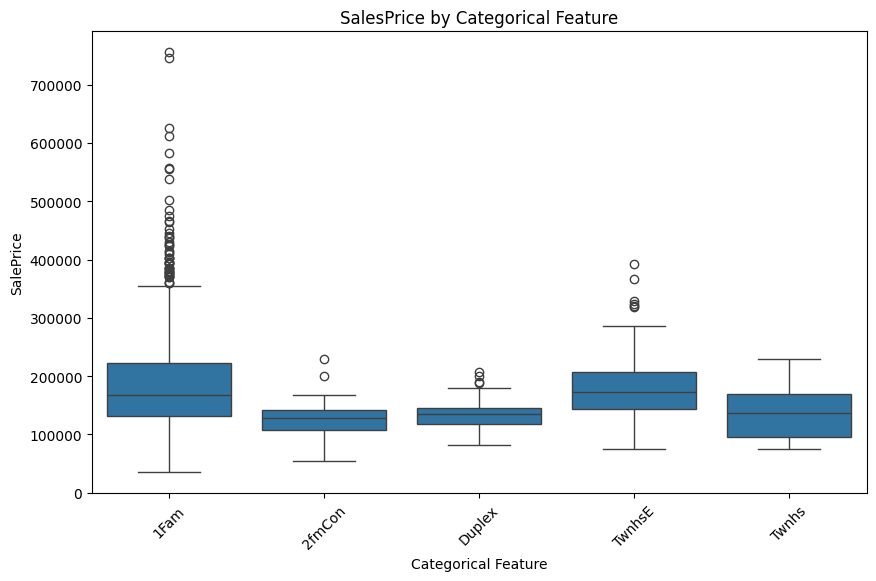

In [ ]:
#2) Find the relationship between Categorical  feature and Sales Price
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

data = pd.read_excel('/content/HousePrediction.xlsx')

plt.figure(figsize=(10, 6))
sns.boxplot(x='BldgType', y='SalePrice', data=data)
plt.title('SalesPrice by Categorical Feature')
plt.xlabel('Categorical Feature')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

In [14]:
#4)Find Continous  Features vs  Sales Price
import pandas as pd

# Load your dataset into a Pandas DataFrame
data = pd.read_excel('/content/HousePrediction.xlsx')

# Select continuous features (assuming they are of numeric data type)
continuous_features = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = continuous_features.corr()

# Extract correlations with the sales price
sales_price_correlation = correlation_matrix['SalePrice'].drop('SalePrice')  # Drop the sales price itself

print(sales_price_correlation)

Id             -0.021917
MSSubClass     -0.084284
LotArea         0.263843
OverallCond    -0.077856
YearBuilt       0.522897
YearRemodAdd    0.507101
BsmtFinSF2     -0.011378
TotalBsmtSF     0.613581
Name: SalePrice, dtype: float64


In [ ]:
#5) Do the Feature Engineering for the
		# a)Handle the Missing Values
		# b) Handle the Categorical Variables
		# c) Handle  the Numerical Variables
		# d) Handling  the Temporal Varaibles

# A)Handle the missing values:-
# 1.For numerical features, you can fill missing values with the mean, median, or mode of the respective feature.

# 2.For categorical features, you can fill missing values with the most frequent category or a new category indicating missingness.

# 3.You can also consider advanced techniques such as imputation using machine learning models or using interpolation for time series data.
#####################################################################################


#B)Handle the Categorical Variables
# 1.One-hot encoding: Convert categorical variables into binary vectors, where each category becomes a new binary feature.

# 2.Label encoding: Encode categorical variables with integer labels.

# 3.Target encoding: Encode categorical variables with the mean target value of each category.

# 4.Frequency encoding: Encode categorical variables with the frequency of each category.

# 5.Ordinal encoding: Encode categorical variables with an ordinal relationship using integer labels.
###############################################################################

#C)Handle  the Numerical Variables
# 1.Scaling: Standardize or normalize numerical features to have a similar scale, which can improve the performance of some machine learning algorithms.

# 2.Binning: Convert numerical features into categorical features by binning or discretizing them.

# 3.Transformation: Apply mathematical transformations such as logarithmic transformation, square root transformation, or Box-Cox transformation
#to make the distribution of numerical features more Gaussian-like.
#############################################################################

#D) Handling  the Temporal Varaibles
# 1.Extract useful information: Extract components such as year, month, day, day of the week, or time of day from temporal variables like timestamps.

# 2.Create new features: Generate new features based on temporal variables, such as time differences between events or aggregations over time periods.

# 3.Encode cyclical patterns: Encode cyclical temporal patterns, such as months of the year or hours of the day, using sine and cosine transformations to preserve the cyclic nature of the data.
